In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [26]:
I = np.arange(0.2, 5.2, 0.2)
I = np.insert(I, 21, 4.24)
N = np.array([0.811, 0.833, 0.744, 1.322, 1.388, 1.655, 2.112, 2.524, 2.624, 3.149, 3.074, 3.349, 3.024, 2.986, 2.549, 1.862, 1.424, 1.012, 1.387, 2.624, 3.973, 3.461, 2.062, 0.537, 0.587, 0.312], dtype = 'float')

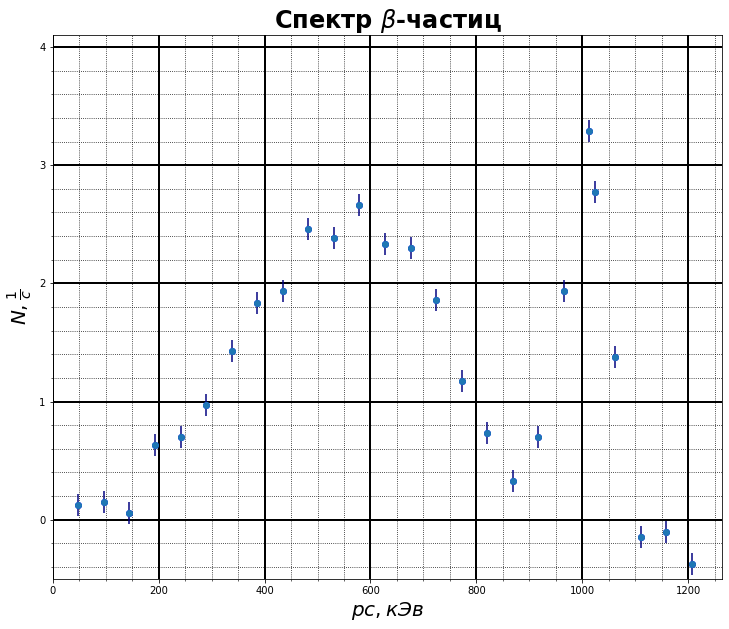

In [27]:
k = 1013.5 / 4.2
pc = k * I
N_tr = N - 0.687
plt.plot(pc, N_tr, "bo")

yerr = np.full(len(pc), 0.093)
plt.errorbar(pc, N_tr, yerr = yerr, fmt='o', ecolor='navy')

plt.title("Спектр "r'$\beta$'"-частиц", fontsize = 24, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)

ax = plt.gca()
ax.set_ylabel(r'$N, \frac{1}{c}$', fontsize = 20)
ax.set_xlabel(r'$pc, кЭв$', fontsize = 20)
ax.set_xlim(0)
ax.set_ylim(-.5, 4.1)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.show()

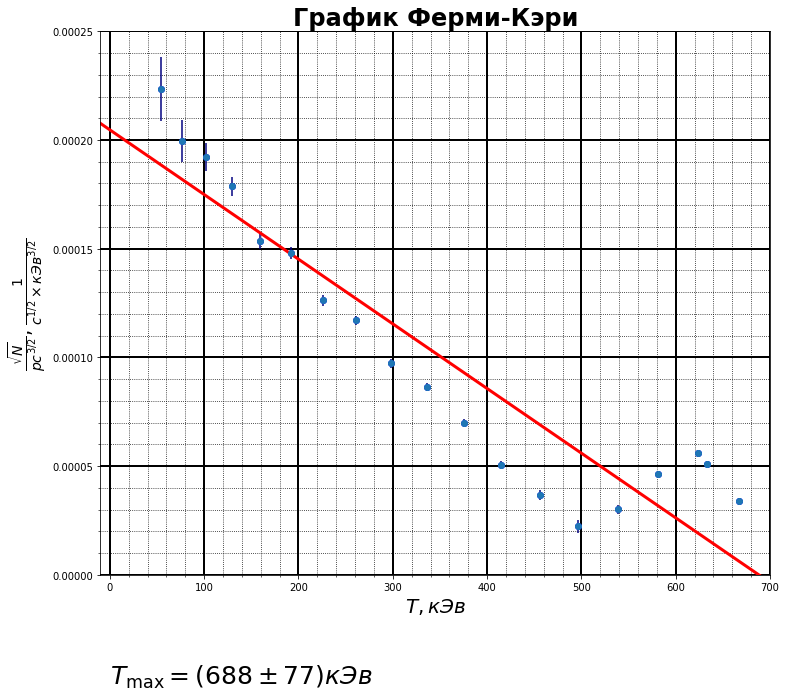

In [43]:
N_cut = np.delete(N_tr, [23, 24, 25])
pc_cut = np.delete(pc, [23, 24, 25])
y = N_cut ** .5 / pc_cut ** 1.5
x = (pc_cut ** 2 + 511 ** 2) ** .5 - 511

x_new = np.delete(x, [0, 1, 2, 3])
y_new = np.delete(y, [0, 1, 2, 3])

plt.plot(x_new, y_new, "bo")
plt.title("График Ферми-Кэри", fontsize = 24, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)

N_new = np.delete(N_cut, [0, 1, 2, 3])
pc_new = np.delete(pc_cut, [0, 1, 2, 3])
yerr = 0.093 / (2 * N_new ** .5 * pc_new ** 1.5)
plt.errorbar(x_new, y_new, yerr = yerr, fmt='o', ecolor='navy')

model = sm.OLS(y_new, sm.add_constant(x_new))
res = model.fit()
params = res.params[::-1]
errors = res.bse[::-1]
straight_line = np.poly1d(params)
inter = np.linspace(-100, 1500, 100)

ax = plt.gca()
ax.set_ylabel(r'$\frac{\sqrt{N}}{{pc}^{3/2}}, \frac{1}{{c}^{1/2} \times {кЭв}^{3/2}}$', fontsize = 20)
ax.set_xlabel(r'$T, кЭв$', fontsize = 20)
ax.set_xlim(-10, 700)
ax.set_ylim(0, 0.00025)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

T_max = -params[1] / params[0]
Gt = T_max * ((errors[1] / params[1]) ** 2 + (errors[0] / params[0]) ** 2) ** .5
plt.text(0., -0.00005, r'$T_\max = (%.f \pm %.f)кЭв$' % (T_max, Gt), fontsize = 25)

plt.plot(inter, straight_line(inter), "r", linewidth = '3')

In [36]:
print(params)
print(errors)
T_max = -params[1] / params[0]
print(T_max)
Gt = T_max * ((errors[1] / params[1]) ** 2 + (errors[0] / params[0]) ** 2) ** .5
print(Gt)
print(N_tr)
print(x_new[0], x[1], x[2], x[3], x[4])

[-3.34041123e-07  2.22002972e-04]
[3.58594868e-08 1.40056760e-05]
664.5977292233921
82.75296479173714
[ 0.124  0.146  0.057  0.635  0.701  0.968  1.425  1.837  1.937  2.462
  2.387  2.662  2.337  2.299  1.862  1.175  0.737  0.325  0.7    1.937
  3.286  2.774  1.375 -0.15  -0.1   -0.375]
35.24937823301423 9.036388923879713 20.11571532127016 35.24937823301423 54.111746720220935


In [40]:
print(np.absolute(N_tr))
print(len(N_cut))
print(k)

[0.124 0.146 0.057 0.635 0.701 0.968 1.425 1.837 1.937 2.462 2.387 2.662
 2.337 2.299 1.862 1.175 0.737 0.325 0.7   1.937 3.286 2.774 1.375 0.15
 0.1   0.375]
23
241.3095238095238
